In [2]:
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)
data = pd.read_csv('model_df_cagr.csv', index_col=0)

In [3]:
data = data[data['issue_d']<'2015-01-01']

In [4]:
drop_cols = ['earliest_cr_line', 'grade', 'id', 'fico_range_low','issue_d','roi_percent']
data= data.drop(drop_cols,axis=1)

In [5]:
le = LabelEncoder()
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']

for feature in categorical_features:
    data[feature]=le.fit_transform(data[feature])
data

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,cagr,credit_hist_years
1117051,21425.0,1,15.59,516.36,0,6,4,63800.0,1,23,18.49,0.0,689.0,0.0,10.0,0.0,16374.0,76.2,35.0,0.0,0.0,0.0,0,0.035537,11.3
1117055,12975.0,0,17.86,468.17,4,10,4,60000.0,5,9,22.42,0.0,684.0,0.0,11.0,0.0,5200.0,33.1,19.0,0.0,0.0,0.0,0,-0.237731,15.9
1117060,2000.0,0,15.99,70.31,1,7,4,37000.0,9,3,16.19,2.0,704.0,1.0,9.0,0.0,4533.0,20.1,22.0,0.0,0.0,0.0,0,0.059097,21.0
1117064,4000.0,0,15.99,140.61,1,9,4,50000.0,2,32,33.99,0.0,669.0,1.0,12.0,0.0,5697.0,65.5,23.0,0.0,0.0,0.0,0,0.075251,12.8
1117080,8750.0,0,21.99,334.13,9,8,0,81200.0,8,11,29.38,0.0,684.0,2.0,12.0,0.0,31362.0,75.9,37.0,0.0,0.0,0.0,0,0.087338,13.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939341,20000.0,1,19.91,361.62,8,10,4,69996.0,2,4,13.84,0.0,719.0,1.0,5.0,0.0,19886.0,98.4,13.0,0.0,0.0,0.0,0,-0.058612,13.5
1939342,18000.0,1,17.58,452.98,3,10,0,100000.0,2,41,17.57,0.0,689.0,1.0,13.0,0.0,19243.0,73.2,41.0,0.0,0.0,0.0,0,0.086089,14.9
1939343,17500.0,1,22.74,471.10,15,6,0,95000.0,2,45,24.78,0.0,664.0,1.0,12.0,0.0,23722.0,76.3,23.0,0.0,0.0,0.0,0,-0.230843,10.0
1939349,20500.0,0,16.77,728.54,1,7,4,60000.0,2,32,16.40,1.0,704.0,3.0,10.0,0.0,15417.0,58.4,20.0,0.0,0.0,0.0,0,0.084890,23.3


In [6]:
Xrf = data.drop('cagr', axis=1)
yrf = data['cagr']

Xrf_train,Xrf_test, yrf_train, yrf_test = train_test_split(Xrf,yrf)

In [7]:
import xgboost as xgb

In [25]:
xgb_model = xgb.XGBRegressor(learning_rate = .01, n_estimators = 30000, max_depth = 5, subsample = .4, colsample_bytree = 1, gamma = 1, max_features = 5)

In [ ]:
gbr = ensemble.GradientBoostingRegressor(learning_rate=.01, max_features = 'auto', subsample = .2)

grid_param_gbr = [{

    'n_estimators' : [1000,5000,10000]}]

In [55]:
eval_set = [(Xrf_train, yrf_train), (Xrf_test, yrf_test)]
eval_metric = ["auc","error"]
%time xgb_model.fit(Xrf_train, yrf_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)


[20:15:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.61520	validation_0-error:0.11819	validation_1-auc:0.60484	validation_1-error:0.11478
[1]	validation_0-auc:0.62727	validation_0-error:0.11819	validation_1-auc:0.61739	validation_1-error:0.11478
[2]	validation_0-auc:0.63465	validation_0-error:0.11819	validation_1-auc:0.61860	validation_1-error:0.11478
[3]	validation_0-auc:0.63731	validation_0-error:0.11819	validation_1-auc:0.61972	validation_1-error:0.11478
[4]	validation_0-auc:0.64399	validation_0-error:0.11819	validation_1-auc:0.62487	validation_1-error:0.11478
[5]	validation_0-auc:0.64754	validation_0-error:0.11819	validation_1-auc:0.62652	validation_1-erro

KeyboardInterrupt: 

In [26]:
xgb_model.fit(Xrf_train, yrf_train)

[14:47:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5, max_features=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=30000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.4,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
prediction_df = Xrf_train.copy()
prediction_df['prediction'] = xgb_model.predict(prediction_df)
prediction_df = pd.concat([prediction_df,yrf_train],axis =1)

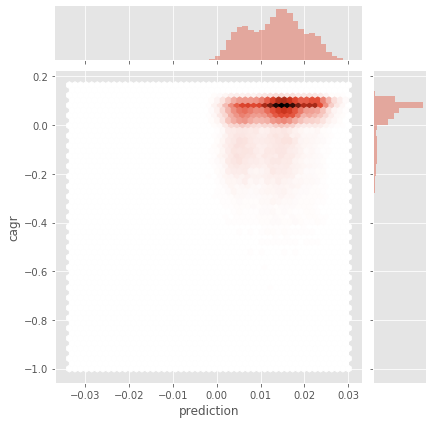

In [28]:
sns.jointplot(x='prediction', y= 'cagr', data = prediction_df, kind = 'hex')

In [29]:
test_prediction = Xrf_test.copy()
test_prediction['prediction'] = xgb_model.predict(test_prediction)
test_prediction = pd.concat([test_prediction,yrf_test],axis =1)

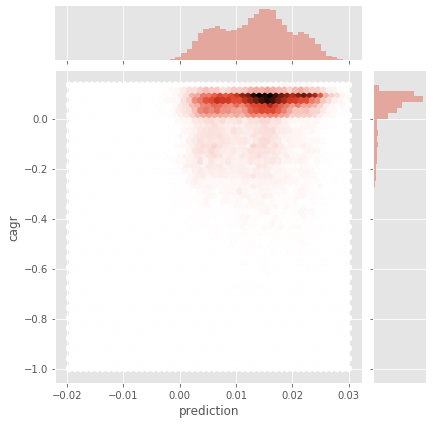

In [30]:
sns.jointplot(x='prediction', y= 'cagr', data = test_prediction, kind = 'hex')

In [41]:
good_loans = test_prediction[test_prediction['prediction'] > .025]

In [39]:
good_loans[good_loans['cagr']<0].shape

(72, 26)

In [44]:
good_loans

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,credit_hist_years,prediction,cagr
1816739,1500.0,0,17.56,53.90,0,10,0,53000.0,9,38,10.17,0.0,719.0,0.0,11.0,0.0,11073.0,57.1,14.0,0.0,0.0,0.0,0,18.2,0.025772,0.022819
1230319,4000.0,0,15.61,139.86,0,3,0,37440.0,4,5,16.96,0.0,669.0,1.0,4.0,0.0,7044.0,65.8,15.0,0.0,0.0,1.0,0,14.8,0.025166,0.053570
1279155,3500.0,0,18.24,126.96,4,2,4,135000.0,8,36,9.23,0.0,689.0,1.0,10.0,0.0,10445.0,47.9,18.0,0.0,0.0,0.0,0,16.5,0.025334,0.058074
1652385,1600.0,0,18.61,58.34,19,3,0,124200.0,9,5,28.29,0.0,644.0,0.0,15.0,0.0,73943.0,98.1,38.0,0.0,0.0,0.0,0,17.5,0.025660,0.092600
1895742,3000.0,0,17.77,108.12,0,1,4,73100.0,2,46,16.92,0.0,664.0,1.0,9.0,0.0,12686.0,94.0,25.0,0.0,0.0,0.0,0,10.3,0.025022,0.090638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822162,4200.0,0,17.56,150.92,0,7,0,175000.0,9,43,21.00,2.0,694.0,0.0,10.0,0.0,12192.0,95.2,44.0,0.0,0.0,0.0,0,25.0,0.029021,0.076552
1826081,2000.0,0,18.25,72.56,1,10,0,118000.0,12,47,27.52,0.0,674.0,0.0,12.0,0.0,13278.0,56.3,28.0,0.0,0.0,0.0,0,14.1,0.026080,0.071748
1805223,3000.0,0,24.50,118.49,12,3,4,68000.0,9,4,12.26,0.0,689.0,1.0,4.0,0.0,2881.0,96.0,5.0,0.0,0.0,0.0,0,14.8,0.025157,0.124476
1309294,4600.0,0,19.99,170.93,5,10,0,135000.0,9,40,34.55,3.0,669.0,0.0,8.0,0.0,27309.0,98.9,25.0,0.0,0.0,0.0,0,32.2,0.027110,0.101843


In [36]:
good_loans['cagr'].describe()

count    707.000000
mean       0.053266
std        0.092391
min       -0.675759
25%        0.052094
50%        0.083119
75%        0.095586
max        0.129820
Name: cagr, dtype: float64

In [20]:
data['cagr'].describe()

count    122772.000000
mean          0.013007
std           0.117608
min          -1.000000
25%           0.004483
50%           0.058319
75%           0.085979
max           0.164457
Name: cagr, dtype: float64

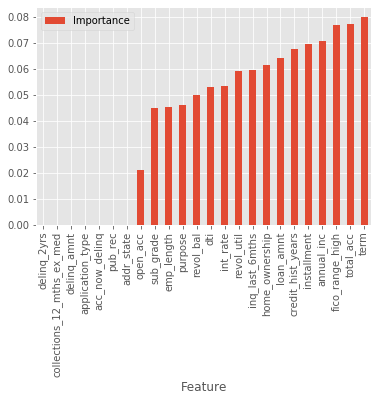

In [37]:
feature_importance=pd.DataFrame(zip(list(xgb_model.feature_importances_),Xrf_train.columns))
feature_importance.columns = ['Importance','Feature']
feature_importance.sort_values('Importance').plot.bar(x='Feature',y='Importance')

In [46]:
Xrf_train

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,credit_hist_years
1231646,17900.0,0,20.20,667.06,7,10,0,78820.0,2,20,21.83,0.0,679.0,1.0,22.0,0.0,16675.0,56.9,30.0,0.0,0.0,0.0,0,11.4
1307733,2500.0,0,23.43,97.34,10,5,0,44500.0,4,47,29.07,0.0,664.0,0.0,10.0,1.0,17768.0,86.7,18.0,0.0,0.0,0.0,0,23.8
1284141,3625.0,0,21.18,136.91,7,3,0,65000.0,4,33,11.60,0.0,684.0,1.0,11.0,1.0,5632.0,59.9,11.0,0.0,0.0,0.0,0,19.2
1156745,19200.0,1,15.61,462.94,0,1,4,55000.0,2,17,31.05,0.0,689.0,0.0,10.0,0.0,16155.0,65.2,23.0,0.0,0.0,0.0,0,11.1
1203824,2200.0,0,23.43,85.66,10,10,0,77000.0,2,26,20.37,2.0,664.0,0.0,8.0,0.0,41190.0,97.1,25.0,0.0,0.0,0.0,0,23.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865084,9000.0,0,18.49,327.59,1,1,0,112000.0,1,21,6.20,0.0,669.0,2.0,4.0,0.0,5888.0,98.1,19.0,0.0,0.0,0.0,0,18.1
1296708,17750.0,0,17.57,637.89,1,2,4,42500.0,2,30,21.58,0.0,684.0,0.0,14.0,0.0,23926.0,84.0,19.0,0.0,0.0,0.0,0,30.5
1843901,15000.0,0,18.49,545.99,1,5,0,65000.0,1,19,15.91,1.0,689.0,1.0,15.0,0.0,14784.0,86.5,26.0,0.0,0.0,0.0,0,27.6
1781388,3500.0,0,19.20,128.66,2,6,4,57000.0,2,37,12.97,0.0,669.0,0.0,9.0,0.0,3779.0,78.7,17.0,0.0,0.0,0.0,0,11.5


In [50]:
data['roi_percent'].mean()

0.11734001061875578

In [49]:
test_prediction.to_csv('test_prediction')